<a href="https://colab.research.google.com/github/TaoFeng1234/Tao_Portfolio/blob/master/Groupon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1BpMxj84zKzP44c1_5q_dGkqc8t-NBc3q'
downloaded = drive.CreateFile({'id': file_id})

In [17]:
# Download the file to a local disk as 'exported.xlsx'.
downloaded.GetContentFile('exported.xlsx')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [18]:
# Here it is --
!ls -lha exported.xlsx

-rw-r--r-- 1 root root 9.0M Nov 10 18:53 exported.xlsx


In [19]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd

import pandas as pd
df = pd.read_excel('exported.xlsx')
df

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
0,gr-millevois-tire-service-center,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party
1,gr-manakeesh-cafe-bakery,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party
2,gr-phoenix-salon-and-spa,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party
3,gr-hands-in-motion,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party
4,dc-fd2-bartending-college-allentown-reading,86.800,4253.20000,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party
...,...,...,...,...,...,...,...
138529,gg-zuzuzen-performance-leggings-1,433.136,10824.06864,2013-12-11,http://www.groupon.com/deals/gg-zuzuzen-perfor...,Goods,First - Party
138530,gg-zuzuzen-performance-tight-fit-two-tone-yoga...,239.752,5511.89848,2013-12-24,http://www.groupon.com/deals/gg-zuzuzen-perfor...,Goods,First - Party
138531,gg-zuzuzen-tight-fit-yoga-pant-tank,290.536,5131.06264,2013-12-21,http://www.groupon.com/deals/gg-zuzuzen-tight-...,Goods,First - Party
138532,dr-z-med-spa-philadelphia,1.450,1303.55000,2013-12-10,http://www.groupon.com/deals/dr-z-med-spa-phil...,Local,Third - Party


# Data Exploration

In [89]:
# Split the excel table into three subset. Exclude deals without transcation history in Q4 2013.
local = df[df['Segment'] == 'Local']
goods = df[df['Segment'] == 'Goods']
travel = df[df['Segment'] == 'Travel']

In [90]:
local.describe().astype('int')

,Units Sold,Billings
count,120576,120576
mean,115,3393
std,593,13622
min,-9100,-218062
25%,1,34
50%,13,653
75%,68,2727
max,62500,1371875


All the deals in **Local** segement are Third Party deals.

In [78]:
local[local['Inventory Type'] == 'First - Party'].shape

(0, 7)

In [79]:
local[local['Inventory Type'] != 'First - Party'].shape

(2724, 7)

In [92]:
goods.describe().astype('int')

,Units Sold,Billings
count,15234,15234
mean,683,18527
std,1924,66017
min,-1714,-147360
25%,34,1245
50%,189,5066
75%,591,14511
max,59800,2874885


In [81]:
#Look for the counts by inventory type in goods segement
print(goods[goods['Inventory Type'] == 'First - Party'].shape)
print(goods[goods['Inventory Type'] != 'First - Party'].shape)

(14623, 7)
(611, 7)


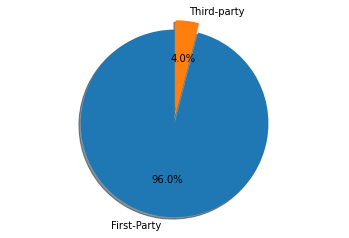

In [82]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First-Party', 'Third-party'
sizes = [14623, 611]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [91]:
travel.describe().astype('int')

,Units Sold,Billings
count,2724,2724
mean,139,25900
std,268,70757
min,-424,-75024
25%,2,288
50%,37,5759
75%,155,23840
max,3511,1552777


All the deals in **Travel** segement are Third Party deals.

In [84]:
#Look for the counts by inventory type in travel segement
print(travel[travel['Inventory Type'] == 'First - Party'].shape)
print(travel[travel['Inventory Type'] != 'First - Party'].shape)

(0, 7)
(2724, 7)


# Get statistics in **Goods** and **Travel**

From the statistics above, we don't see any irregularity occurs in Goods and Travel. Coupled with the background on the dataset, I comes up with the estimate of gross billing in Goods and Travel as below:

In [93]:
print("The estimated gross billing for Goods in Q4 2013 is $", round(goods['Billings'].sum(),2))
print("The estimated total units sold for Goods in Q4 2013 is",round(goods['Units Sold'].sum(),2))
goodsdeal = goods[goods['Start Date'] >= '2013-10-01']
print("The estimated total New Deals started in Q4 2013 is",round(goodsdeal.value_counts().sum(),2))

The estimated gross billing for Goods in Q4 2013 is $ 282245671.04
The estimated total units sold for Goods in Q4 2013 is 10419746.3
The estimated total New Deals started in Q4 2013 is 12749


In [94]:
print("The estimated gross billing for Travel in Q4 2013 is $", round(travel['Billings'].sum(),2))
print("The estimated total units sold for Travel in Q4 2013 is",round(travel['Units Sold'].sum(),2))
traveldeal = travel[travel['Start Date'] >= '2013-10-01']
print("The estimated total New Deals started for Travel in Q4 2013 is",round(traveldeal.value_counts().sum(),2))


The estimated gross billing for Travel in Q4 2013 is $ 70552062.12
The estimated total units sold for Travel in Q4 2013 is 378910.2
The estimated total New Deals started for Travel in Q4 2013 is 2177


# Estimation for the missing data

**Background**: *'Our dataset includes zero **Local** deal that started from *Oct. 20 to Oct. 30, 2013* (the missing period) inclusive' *

First, we can estimate the number of new deals launched during the missing period.



Considering the potential impact of holiday promotion. I found the following important holidays in Q4 2013.


**Christmas Day** -  Friday, December 25

**Black Friday** - Friday, November 27

**Cyber Monday** - Monday, November 30


## Analysis for **'New Deals Start'** in Q4 2013

Count the number of active deals in Q4 2013 by the **Start date** and obtain the following dataframe. 

**Adjustment**: By excluding the deals without any transcations happened in Q4 2013, I can estimate the **New Deals Started** in the missing period more accurately. 

In [95]:
#Aggregate the count of new active deals luanched by date and sort
dealcount = local['Start Date'].value_counts().to_frame() 
dealcount.columns = ['CountbyDate']
dealcount.index = pd.to_datetime(dealcount.index)
dealcount.sort_index(ascending= True)

,CountbyDate
2011-11-21,4
2012-06-06,1
2012-06-26,2
2012-07-01,1
2012-07-07,1
...,...
2013-12-27,633
2013-12-28,642
2013-12-29,288
2013-12-30,569


In [98]:
# The majority of the active deals in Q4 2013 are launched in 2013. Get a subset of the active deals
#that lauched in 2013. Plot the new deals luanched count by date and observe the pattern.
dc2013 = dealcount[dealcount.index >= '2013-01-01'].sort_index(ascending = True)
#To make sure there is no other data missing in 2013.
pd.date_range(start = '2013-01-01', end = '2013-12-31' ).difference(dc2013.index)

DatetimeIndex(['2013-10-20', '2013-10-21', '2013-10-22', '2013-10-23',
               '2013-10-24', '2013-10-25', '2013-10-26', '2013-10-27',
               '2013-10-28', '2013-10-29', '2013-10-30'],
              dtype='datetime64[ns]', freq=None)

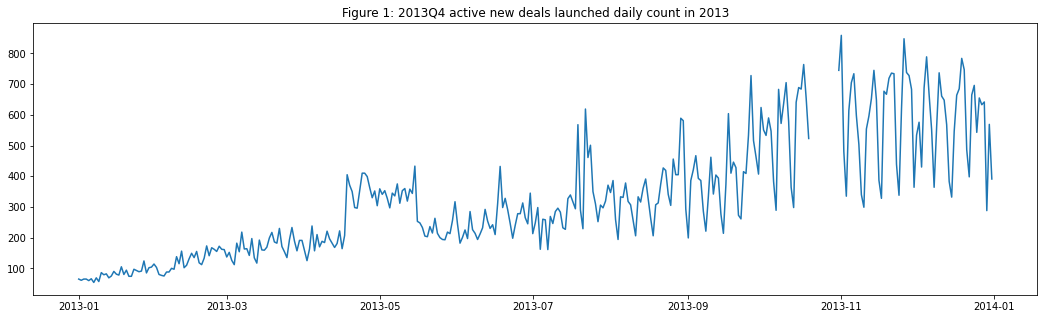

In [99]:
idx = dc2013.index.get_loc('2013-10-19')
plt.figure(figsize=(18,5))
plt.plot(dc2013[0:idx+1])
plt.plot(dc2013[idx+1:],color = '#1f77b4')
plt.title('Figure 1-1: 2013Q4 active new deals launched daily count in 2013')
plt.show()

From Figure 1-1, a regualr time-series pattern can be observed after 2013-10, in Q4. Plot the data in 2013Q4 as Figure 1-2. We will see a sequence of roughly equally spaced out points. This evidence supports the estimate of the number of new deals launched daily from 2013-10-20 to 201-10-30 as time series data . 

In addition, as it approachs to the year end, there was less new deals launched. It makes sense. Hence, I take out the data in the period of 2013-12-25 to 2013-12-31 when training the model.  

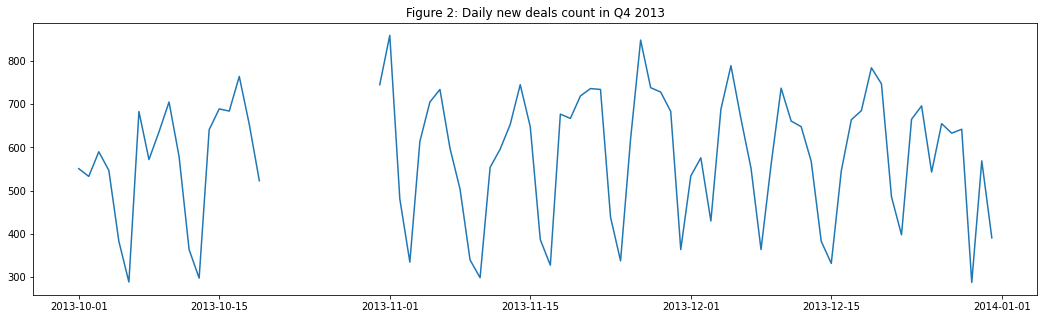

In [100]:
dc2013q4 = dealcount[dealcount.index >= '2013-10-01'].sort_index(ascending = True)
plt.figure(figsize=(18,5))
plt.plot(dc2013q4[0:19])
plt.plot(dc2013q4[19:],color = '#1f77b4')
plt.title('Figure 1-2: Daily new deals count in Q4 2013')
plt.show()

In [10]:
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import DataFrame
from pandas import to_datetime

In [11]:
df = dc2013q4
df['ds'] = df.index
df.columns = ['y','ds']
df = df.reindex(columns = ['ds','y'])
df = df.reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds        yhat  yhat_lower  yhat_upper
0  2013-10-20  333.506021  252.823855  412.792061
1  2013-10-21  517.022815  431.960451  593.569743
2  2013-10-22  536.534528  457.404502  618.003658
3  2013-10-23  551.267293  474.794267  632.015977
4  2013-10-24  618.935268  537.095997  695.182273
5  2013-10-25  555.116303  479.730870  635.577874
6  2013-10-26  390.744481  311.253622  479.513695
7  2013-10-27  334.701286  255.791019  419.987246
8  2013-10-28  518.218080  438.868537  595.035737
9  2013-10-29  537.729793  459.339385  611.449263
10 2013-10-30  552.462558  473.527266  634.266912


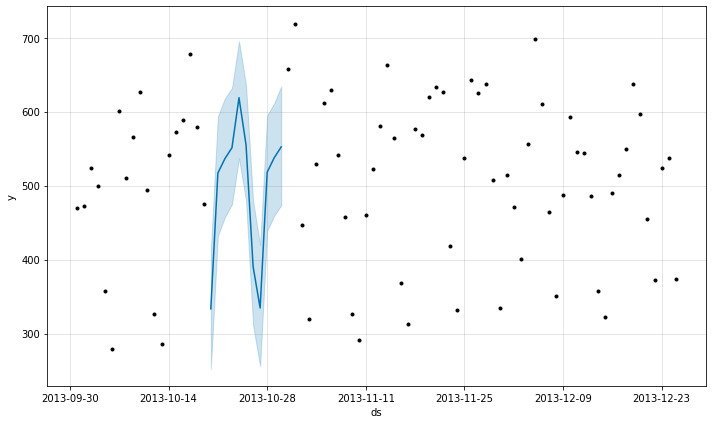

In [12]:
df = dc2013q4[0:75]
df['ds'] = df.index
df.columns = ['y','ds']
df = df.reindex(columns = ['ds','y'])
df = df.reset_index(drop=True)
mod = Prophet()
mod.fit(df)
missing = list()
for i in range(20,31):
	date = '2013-10-%d' % i
	missing.append([date])
missing = DataFrame(missing)
missing.columns = ['ds']
missing['ds']= to_datetime(missing['ds'])
missing['floor'] = 0
# use the model to make a forecast
forecast = mod.predict(missing)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# plot forecast
mod.plot(forecast)
pyplot.show()

In [13]:
print(forecast[['yhat']].sum())
print(forecast[['yhat_lower']].sum())
print(forecast[['yhat_upper']].sum())

yhat    5446.238425
dtype: float64
yhat_lower    4572.589772
dtype: float64
yhat_upper    6327.394438
dtype: float64


### Backtesting

In [62]:
df2 = dc2013q4[19:63]
df2['ds'] = df2.index
df2.columns = ['y','ds']
df2 = df2.reindex(columns = ['ds','y'])
df2 = df2.reset_index(drop=True)
mod2 = Prophet()
mod2.fit(df2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 29.742


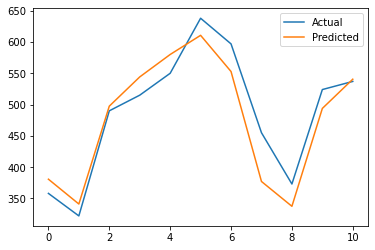

In [64]:
date_pred = DataFrame(df['ds'][63:74])
# use the model to make a forecast
pred = mod2.predict(date_pred)
# calculate MAE between expected and predicted values for december
y_true = df['y'][63:74].values
y_pred = pred['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

## Analysis for **Billings** in 2013 Q4 

In [88]:
billing = local.groupby('Start Date')['Billings'].sum().to_frame()
billing['Billings'] = billing['Billings']

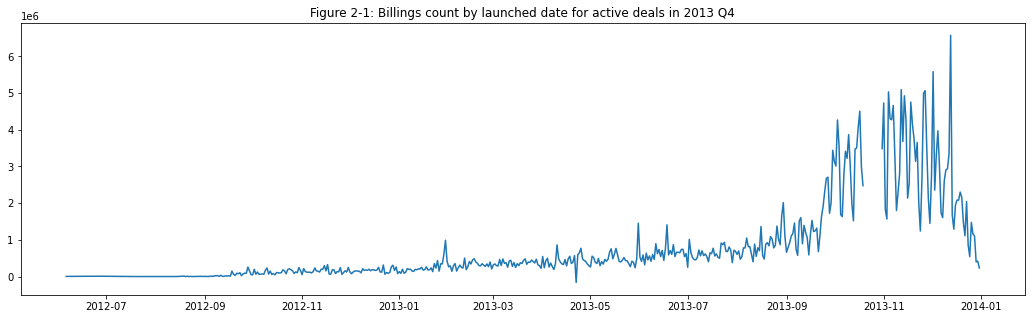

In [102]:
idx = billing.index.get_loc('2013-10-19')
plt.figure(figsize=(18,5))
plt.plot(billing[0:idx+1])
plt.plot(billing[idx+1:],color = '#1f77b4')
plt.title('Figure 2-1: Billings count by launched date for active deals in 2013 Q4')
plt.show()

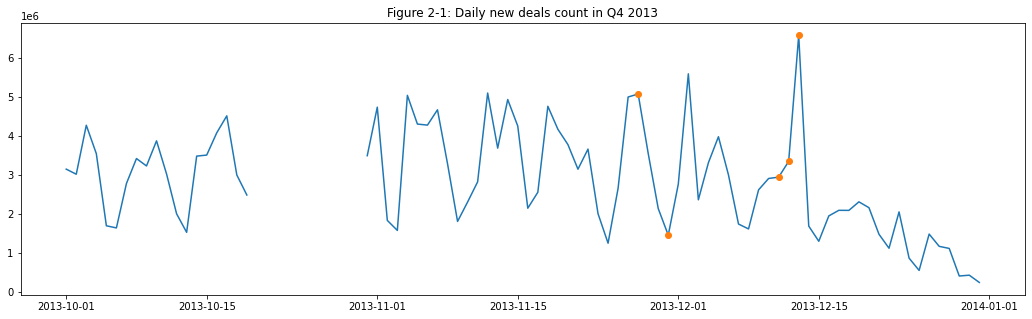

In [108]:
billing2013q4 = billing[billing.index.get_loc('2013-10-01'):]
idx = billing2013q4.index.get_loc('2013-11-27')
billing2013q4 = billing[billing.index >= '2013-10-01'].sort_index(ascending = True)
plt.figure(figsize=(18,5))
plt.plot(billing2013q4[0:19])
plt.plot(billing2013q4[19:],color = '#1f77b4')
roots = ['2013-11-27','2013-11-30','2013-12-11','2013-12-12','2013-12-13']
mark = [billing2013q4.index.get_loc(i) for i in roots]
plt.plot(billing2013q4.iloc[mark], ls="", marker="o", label="points")
plt.title('Figure 2-1: Daily new deals count in Q4 2013')
plt.show()

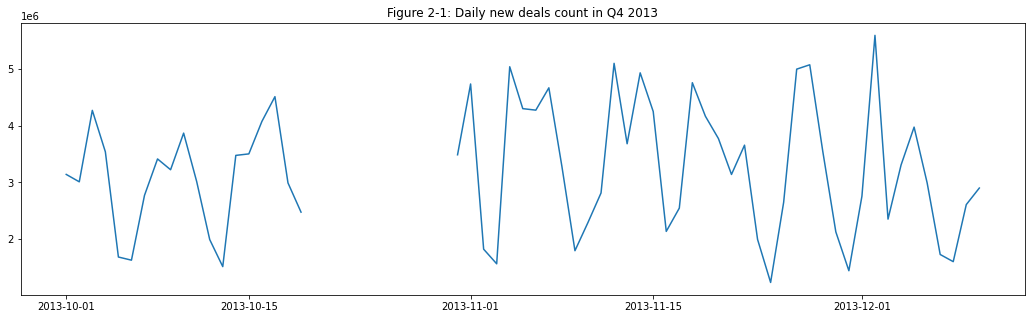

In [120]:
plt.figure(figsize=(18,5))
plt.plot(billing2013q4[0:19])
plt.plot(billing2013q4[19:60],color = '#1f77b4')
plt.title('Figure 2-1: Daily new deals count in Q4 2013')
plt.show()

### Estimation

Considering the impact of holiday seasonal buying and the observation from Figure 2-1, I will only use the data from 2013-10-01 to 2013-11-22 to make the estiamtation for the missing data.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds          yhat    yhat_lower    yhat_upper
0  2013-10-20  1.860431e+06  9.379733e+05  2.805673e+06
1  2013-10-21  3.676325e+06  2.765769e+06  4.565789e+06
2  2013-10-22  3.734303e+06  2.869579e+06  4.614640e+06
3  2013-10-23  3.779399e+06  2.840818e+06  4.645830e+06
4  2013-10-24  4.021909e+06  3.087922e+06  4.918234e+06
5  2013-10-25  3.378048e+06  2.480687e+06  4.279705e+06
6  2013-10-26  1.880292e+06  9.587706e+05  2.771011e+06
7  2013-10-27  1.872389e+06  9.809154e+05  2.739350e+06
8  2013-10-28  3.688284e+06  2.748056e+06  4.555601e+06
9  2013-10-29  3.746261e+06  2.751163e+06  4.654879e+06
10 2013-10-30  3.791357e+06  2.918644e+06  4.694343e+06


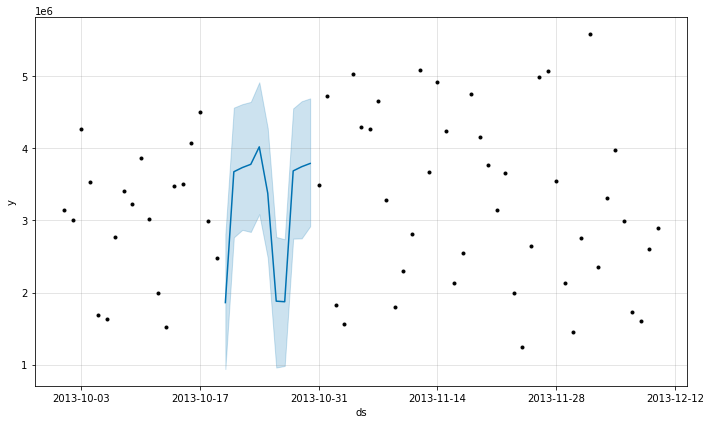

In [121]:
df = billing2013q4[0:60]
df['ds'] = df.index
df.columns = ['y','ds']
df = df.reindex(columns = ['ds','y'])
df = df.reset_index(drop=True)
mod = Prophet()
mod.fit(df)
missing = list()
for i in range(20,31):
	date = '2013-10-%d' % i
	missing.append([date])
missing = DataFrame(missing)
missing.columns = ['ds']
missing['ds']= to_datetime(missing['ds'])
missing['floor'] = 0
# use the model to make a forecast
forecast = mod.predict(missing)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# plot forecast
mod.plot(forecast)
pyplot.show()

In [122]:
print(forecast[['yhat']].sum())
print(forecast[['yhat_lower']].sum())
print(forecast[['yhat_upper']].sum())

yhat    3.542900e+07
dtype: float64
yhat_lower    2.534030e+07
dtype: float64
yhat_upper    4.524505e+07
dtype: float64
